In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/train.json
/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val.json
/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/car28.json
/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/moto23.json
/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/truck29.jpg
/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/moto26.jpg
/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/person28.jpg
/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/person23.json
/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/truck27.json
/kaggle/input/datasets/zoltan

In [2]:
!pip install -q ultralytics opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.3 MB/s eta 0:00:0000:01


In [3]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
DATASET_PATH = "/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset"   # CHANGE THIS

print("Dataset folder content:")
print(os.listdir(DATASET_PATH))


Dataset folder content:
['train.json', 'val', 'train', 'val.json']


In [5]:
train_images = os.path.join(DATASET_PATH, "/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/train")
train_labels = os.path.join(DATASET_PATH, "/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/train.json")

val_images = os.path.join(DATASET_PATH, "/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val")   # sometimes folder name is valid
val_labels = os.path.join(DATASET_PATH, "/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val.json")

print("Train images exists:", os.path.exists(train_images))
print("Train labels exists:", os.path.exists(train_labels))
print("Val images exists:", os.path.exists(val_images))
print("Val labels exists:", os.path.exists(val_labels))


Train images exists: True
Train labels exists: True
Val images exists: True
Val labels exists: True


In [6]:
data_yaml = f"""
train: {train_images}
val: {val_images}

nc: 7
names: ["car", "bus", "truck", "moto", "person","stopsign","trafficlight"]
"""

with open("data.yaml", "w") as f:
    f.write(data_yaml)

print("data.yaml created successfully!")
print(data_yaml)


data.yaml created successfully!

train: /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/train
val: /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val

nc: 7
names: ["car", "bus", "truck", "moto", "person","stopsign","trafficlight"]



In [7]:
model = YOLO("yolov8n.pt")   # nano model (fastest)


In [8]:
model.train(
    data="/kaggle/working/data.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    device=0
)


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/30      2.15G          0        113          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.6it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 9.2it/s 0.3s0.3s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       3/30      2.17G          0      107.6          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.7it/s 1.4s0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.0it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       4/30      2.18G          0      102.5          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.7it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 9.4it/s 0.3s0.3s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       5/30       2.2G          0      97.91          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.8it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.8it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       6/30      2.22G          0      94.45          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.9it/s 1.4s0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 9.8it/s 0.3s0.3s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       7/30      2.23G          0      92.05          0          0        640: 100% ━━━━━━━━━━━━ 11/11 8.1it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.6it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/30      2.25G          0      89.67          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.9it/s 1.4s0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.4it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/30      2.27G          0      87.94          0          0        640: 100% ━━━━━━━━━━━━ 11/11 8.1it/s 1.4s0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 9.7it/s 0.3s0.3s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/30      2.28G          0      85.71          0          0        640: 100% ━━━━━━━━━━━━ 11/11 8.2it/s 1.3s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.2it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      11/30      2.29G          0      83.61          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.9it/s 1.4s0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 8.3it/s 0.4s0.3s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      12/30      2.31G          0      81.99          0          0        640: 100% ━━━━━━━━━━━━ 11/11 8.1it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 9.8it/s 0.3s0.3s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      13/30      2.33G          0      80.73          0          0        640: 100% ━━━━━━━━━━━━ 11/11 8.1it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.2it/s 0.3s.3s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      14/30      2.34G          0      79.19          0          0        640: 100% ━━━━━━━━━━━━ 11/11 8.0it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 9.8it/s 0.3s0.3s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      15/30      2.35G          0      77.64          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.9it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.1it/s 0.3s.3s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      16/30      2.38G          0      76.07          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.8it/s 1.4s0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.1it/s 0.3s.3s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      17/30      2.39G          0       74.6          0          0        640: 100% ━━━━━━━━━━━━ 11/11 8.2it/s 1.3s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.2it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      18/30      2.41G          0       73.4          0          0        640: 100% ━━━━━━━━━━━━ 11/11 8.0it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.5it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      19/30      2.41G          0       72.3          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.9it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.4it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      20/30      2.44G          0       71.1          0          0        640: 100% ━━━━━━━━━━━━ 11/11 8.0it/s 1.4s0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.8it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      21/30      2.45G          0      70.03          0          0        640: 100% ━━━━━━━━━━━━ 11/11 4.1it/s 2.7s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 6.8it/s 0.4s0.3s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      22/30      2.47G          0      69.15          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.1it/s 1.5s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 6.7it/s 0.4s0.3s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      23/30      2.48G          0      68.39          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.4it/s 1.5s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.7it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      24/30       2.5G          0      67.57          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.8it/s 1.4s0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 11.0it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      25/30      2.52G          0      66.87          0          0        640: 100% ━━━━━━━━━━━━ 11/11 8.0it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.4it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      26/30      2.53G          0      66.33          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.9it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.9it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      27/30      2.54G          0      65.96          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.8it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 11.0it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      28/30      2.56G          0      65.62          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.7it/s 1.4s0.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.6it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      29/30      2.58G          0      65.34          0          0        640: 100% ━━━━━━━━━━━━ 11/11 8.0it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 10.2it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      30/30      2.59G          0      65.21          0          0        640: 100% ━━━━━━━━━━━━ 11/11 7.7it/s 1.4s.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 11.3it/s 0.3s.2s
                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:839: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



30 epochs completed in 0.019 hours.
Optimizer stripped from /kaggle/working/runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from /kaggle/working/runs/detect/train/weights/best.pt, 6.2MB

Validating /kaggle/working/runs/detect/train/weights/best.pt...
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 7.1it/s 0.4s0.3s


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:657: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:703: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:703: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultraly

                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /kaggle/working/runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([], dtype=int64)
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799eb1fdef00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [9]:
metrics = model.val()
print(metrics)


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 474.8±119.4 MB/s, size: 306.1 KB)
val: Scanning /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val... 0 images, 71 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 71/71 1.6Kit/s 0.0s
WARNING ⚠️ val: No labels found in /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
WARNING ⚠️ val: Cache directory /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset is not writable, cache not saved.
WARNING ⚠️ Labels are missing or empty in /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val.cache, training may not work correctly. See https://d

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:657: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:703: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:703: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultraly

                   all         71          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, cannot compute metrics without labels
Speed: 4.3ms preprocess, 5.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to /kaggle/working/runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([], dtype=int64)
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799f06ce0bc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.02

Total images found: 71
✅ Testing image: /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/truck29.jpg

image 1/1 /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/truck29.jpg: 480x640 (no detections), 42.2ms
Speed: 3.6ms preprocess, 42.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


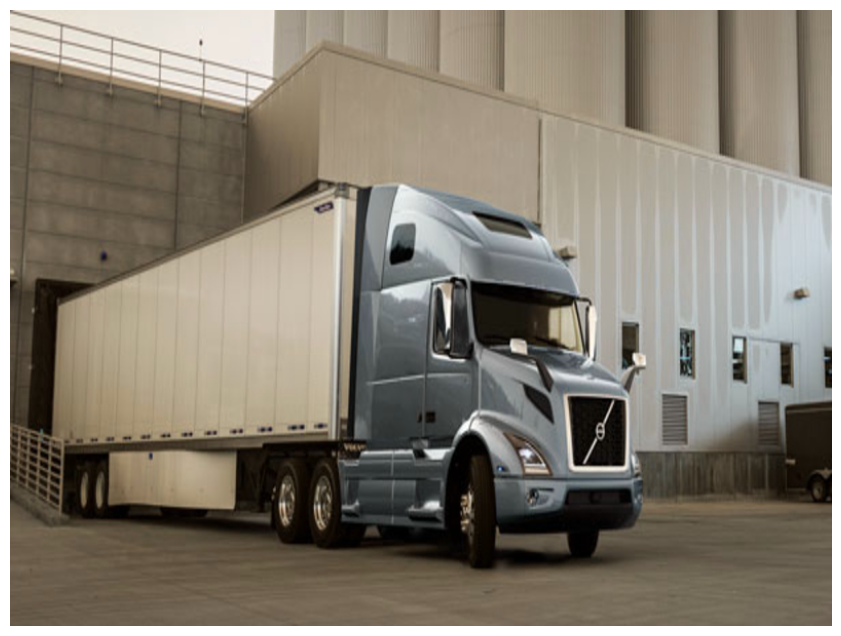

In [10]:
import os
import matplotlib.pyplot as plt

# YOUR validation folder
val_images = "/kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val"

# pick only image files
image_files = [f for f in os.listdir(val_images) if f.endswith((".jpg", ".png", ".jpeg"))]

print("Total images found:", len(image_files))

# if no images found, print folder files
if len(image_files) == 0:
    print("❌ No images found in this folder. Folder contains:")
    print(os.listdir(val_images)[:20])

else:
    sample_image = image_files[0]
    image_path = os.path.join(val_images, sample_image)

    print("✅ Testing image:", image_path)

    results = model(image_path)
    img = results[0].plot()

    plt.figure(figsize=(12,8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()



image 1/1 /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/truck29.jpg: 480x640 (no detections), 6.7ms
Speed: 2.7ms preprocess, 6.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


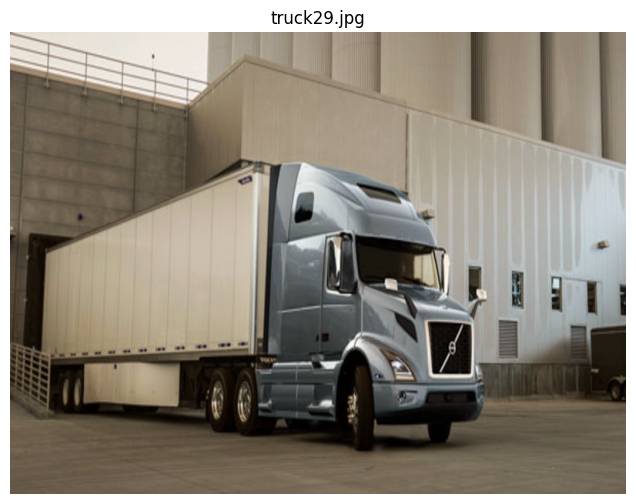


image 1/1 /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/moto26.jpg: 480x640 (no detections), 6.2ms
Speed: 2.4ms preprocess, 6.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


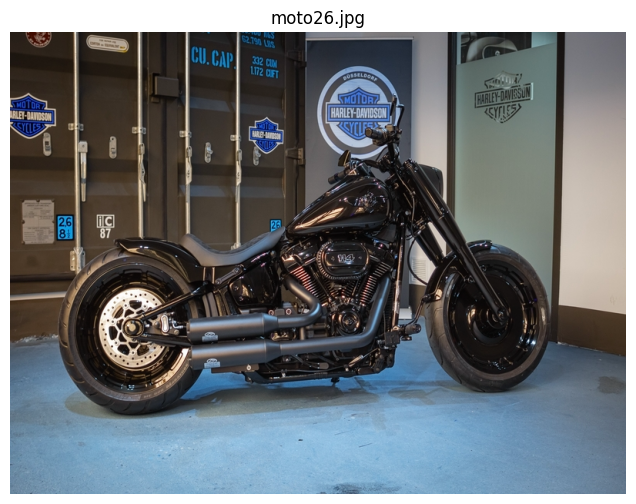


image 1/1 /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/person28.jpg: 480x640 (no detections), 6.5ms
Speed: 2.2ms preprocess, 6.5ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


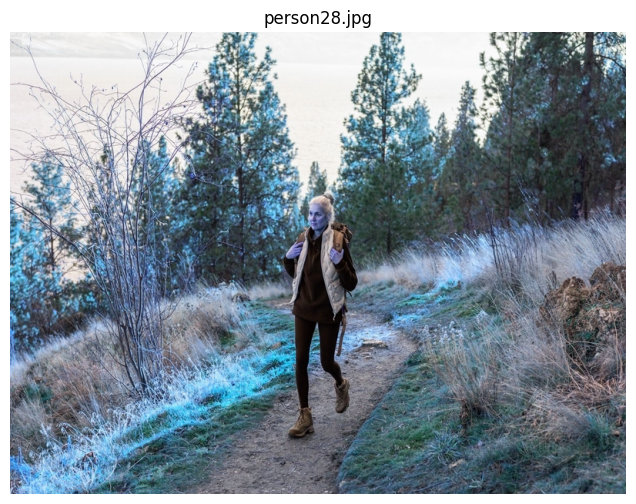


image 1/1 /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/trafficlight22.jpg: 480x640 (no detections), 6.7ms
Speed: 2.2ms preprocess, 6.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


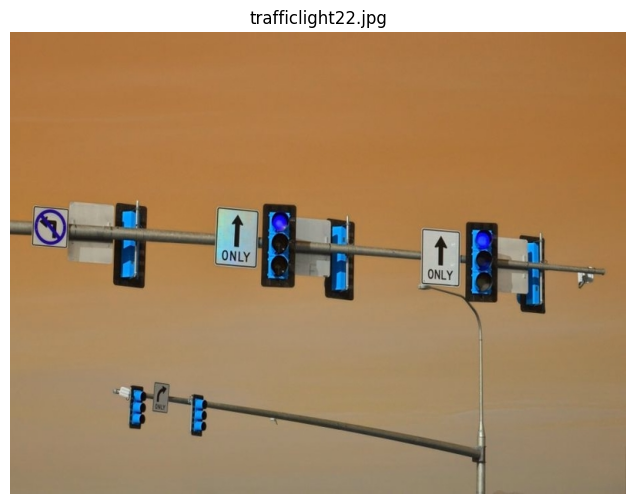


image 1/1 /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/trafficlight25.jpg: 480x640 (no detections), 6.6ms
Speed: 2.4ms preprocess, 6.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


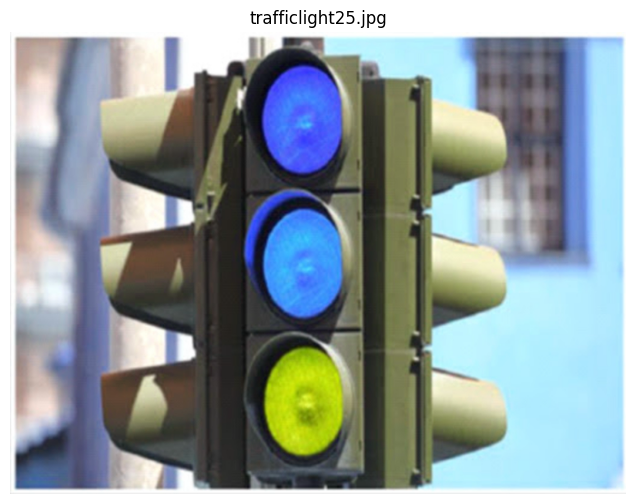

In [11]:
import os
import matplotlib.pyplot as plt

# only image files
images_list = [f for f in os.listdir(val_images) if f.endswith((".jpg", ".png", ".jpeg"))][:5]

for img_name in images_list:
    img_path = os.path.join(val_images, img_name)

    results = model(img_path)
    plotted = results[0].plot()

    plt.figure(figsize=(10,6))
    plt.imshow(plotted)
    plt.title(img_name)
    plt.axis("off")
    plt.show()


In [12]:
print("Your trained model is saved here:")
print("/kaggle/working/runs/detect/train/weights/best.pt")


Your trained model is saved here:
/kaggle/working/runs/detect/train/weights/best.pt


In [13]:
import random
import os
from collections import Counter

image_files = [f for f in os.listdir(val_images) if f.endswith((".jpg", ".png", ".jpeg"))]

img_name = random.choice(image_files)
img_path = os.path.join(val_images, img_name)

print("Testing Image:", img_path)

results = model(img_path)

detected_classes = []
for box in results[0].boxes:
    cls_id = int(box.cls[0])
    detected_classes.append(results[0].names[cls_id])

count_result = Counter(detected_classes)

print("Detected Object Counts:")
for obj, cnt in count_result.items():
    print(f"{obj}: {cnt}")


Testing Image: /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/moto28.jpg

image 1/1 /kaggle/input/datasets/zoltanszekely/mini-traffic-detection-dataset/traffic_detector_dataset/val/moto28.jpg: 480x640 (no detections), 6.6ms
Speed: 2.6ms preprocess, 6.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
Detected Object Counts:


In [14]:
video_path = "/kaggle/input/datasets/f223387ghayashussain/sample-video-traffic"  # example

model.predict(
    source=video_path,
    save=True,
    conf=0.3
)

print("Output saved in runs/detect/predict/")



WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/551) /kaggle/input/datasets/f223387ghayashussain/sample-video-traffic/131232-749706873_small.mp4: 640x384 (no detections), 43.3ms
video 1/1 (frame 2/551) /kaggle/input/datasets/f223387ghayashussain/sample-video-traffic/131232-749706873_small.mp4: 640x384 (no detections), 6.1ms
video 1/1 (frame 3/551) /kaggle/input/datasets/f223387ghayashussain/sample-video-traffic/131232-749706873_small.mp4: 640x384 (no detections), 6.8ms
video 1/1 (fr

In [15]:
import os

output_path = "/kaggle/working/runs/detect/predict"
print(os.listdir(output_path))


['131232-749706873_small.avi']


In [ ]:
from IPython.display import Video

# Replace 'traffic.avi' with the actual output filename
Video("/kaggle/working/runs/detect/predict/131232-749706873_small.avi", embed=True)


In [ ]:
for file in os.listdir(output_path):
    if file.endswith(".avi"):
        print("Found video:", file)
        video_file = file

Video(os.path.join(output_path, video_file), embed=True)


In [ ]:
print(os.listdir("/kaggle/working/runs/detect"))


In [28]:
from IPython.display import FileLink
FileLink("/kaggle/working/runs/detect/predict/131232-749706873_small.avi")


/kaggle/working/runs/detect/predict/131232-749706873_small.avi

In [27]:
!apt-get install -y ffmpeg  # install ffmpeg if not already
!ffmpeg -i /kaggle/working/runs/detect/predict/131232-749706873_small.avi -vcodec libx264 -crf 28 /kaggle/working/runs/detect/predict/131232-749706873_small.mp4


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 123 not upgraded.
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq 

In [ ]:
!ffmpeg -i /kaggle/working/runs/detect/predict/131232-749706873_small.avi -t 60 -c copy /kaggle/working/runs/detect/predict/131232-749706873_small.avi
!ffmpeg -i /kaggle/working/runs/detect/predict/131232-749706873_small.avi -ss 60 -c copy /kaggle/working/runs/detect/predict/131232-749706873_small.avi


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [41]:
import cv2
import torch

# Load YOLOv5 model (you can replace 'yolov5s' with your custom model path)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Open your video
cap = cv2.VideoCapture('/kaggle/input/datasets/f223387ghayashussain/sample3trafficmonitor/sample.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Output video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/kaggle/working/traffic_output3.mp4', fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO detection
    results = model(frame)

    # Render detections on the frame
    frame_with_boxes = results.render()[0]  # returns a list of frames with boxes drawn

    # Write the frame to output video
    out.write(frame_with_boxes)

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()
print("✅ Video saved as 'traffic_output.mp4' with visible detections!")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2026-2-14 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/commo

✅ Video saved as 'traffic_output.mp4' with visible detections!


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.am